#**ASSIGMENT ONE:** Bag of Words implementation for Sentiment analysis 💭


Once Jeff finished his coffee, he settled into his desk at Amazon's bustling headquarters in Seattle. As a data analyst at the world's largest online retailer, Jeff was accustomed to diving deep into the ocean of data generated by millions of transactions every day.

Today, Jeff had a new challenge on his plate. The marketing team wanted to gain insights into customer sentiment regarding their latest products. Specifically, they were interested in understanding whether customers were generally satisfied or dissatisfied with their purchases.

After pondering over various approaches, Jeff decided to task his team of interns with a hands-on assignment to implement Bag of Words (BoW) and Naive Bayes classification for sentiment analysis on Amazon reviews.

As an intern is your task to complete this challenge the best way possible to impress your boss and hopefully get a full time position at the company.  

The following notebook will guide you into how to create your BoW implementation for sentiment analysis and hopefully make jeff happy 🤭

As a first step we need to get all of our data ready

In [24]:
#download train and test set
!gdown  https://drive.google.com/file/d/1bcnYdTHuY2pr4py5tG-HtNU73pJzRH7U/view?usp=sharing --fuzzy
!gdown  https://drive.google.com/file/d/1T19F6Oge0-qHMqX_IKiU_l94Y1k2oLJp/view?usp=sharing --fuzzy

/bin/sh: 1: gdown: not found
/bin/sh: 1: gdown: not found


In [25]:
#unzip
!unzip train.ft.zip
!unzip test.ft.zip

unzip:  cannot find or open train.ft.zip, train.ft.zip.zip or train.ft.zip.ZIP.
unzip:  cannot find or open test.ft.zip, test.ft.zip.zip or test.ft.zip.ZIP.


Our txts has the following format


```
__label__#  This is a review ....

```

As you see the first word refers to the label, `__label__1` corresponds to 1- and
2-star reviews(negative sentiment) and `__label__2` corresponds to to 4- and 5-star reviews (positive sentiment).

Normally reviews are very messy including words with incorrect spelling, different formats and a lot of words that do not add any value to our classification. Let's create a method to clean them

In [26]:
#import nltk libray, you are going to need this later
import nltk
import pandas as pd
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/o_heidar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import string
import re
from nltk.corpus import stopwords
def preprocess_text(text):
  """
    Method to clean reviews from noise and standarize text across the different classes.\n",
    The preprocessing includes converting to lowercase, removing punctuation, and removing stopwords.\n",
    Arguments\n",
      ---------\n",
      text : String\n",
         Text to clean\n",
      Returns\n",
      -------\n",
      text : String\n",
          Cleaned text\n",
    """
  stop_words = set(stopwords.words('english'))
  text = text.lower() #make everything lower case\n",
  text = text.replace('\\n', ' ') #remove \\n characters\n",
  text = re.sub(r'[^\\w\\s]', ' ', text) #remove any punctuation or special characters\n",
  text = re.sub(r'\\d+', ' ', text) #remove all numbers\n",
  text = ' '.join([word for word in text.split() if word not in stop_words]) #remove all stopwords\n",
  return text

It's also useful to have our data organized and ready to access! An great library for this is [pandas](https://pandas.pydata.org/). In the folowing code cell you will create a dataframe containing all the data provided in the training document. Please be patient this code cell can take up to 10 min (is a big dataset!)

In [28]:
def create_dataframe(path_to_file):
  """ Creates dataframe of reviews and labels
  Arguments
  ---------
  path_to_file : str
      path to file to read
  Returns
  -------
  df : pandas dataframe
      Dataframe of reviews and labels
  """
  df={}
  index= 0
  with open(path_to_file) as f:
    for line in f:
      label_text = line.split()[0] #get label from line in file
      text = ' '.join(line.split()[1:]) #get text of the review
      label = 0 if label_text == '__label__1' else 1 # get numeric value of label_text. If label_text is __label__1 then label = 0 if __label__2 label = 1
      text = preprocess_text(text) #preprocess text
      df[index] = {'label': label, 'text': text} #create dictionary with keys "label" and "text" and set the correct values
      index+=1
  return pd.DataFrame.from_dict(df,orient='index')

df_train= create_dataframe('train.ft.txt')
df_test= create_dataframe('test.ft.txt')

In [29]:
def vocab_dictionary(df):
  """ Creates dictionary of frequencies based on a dataset of reviews
  Arguments
  ---------
  dataset : list of tuples
      list of tuples of the form (label, text)
  Returns
  -------
  vocab_dict : dictonary
      Dictionary of words and their frequencies with the format {word: frequency}
  """

  vocab= {} #create empty dictionary
  #iterate through rows of df and count the frequency of words
  for text in df['text']:
    words = text.split()
    for word in words:
      vocab[word] = vocab[word] + 1 if word in vocab else 1
  return vocab


full_vocab=vocab_dictionary(df_train)
positive_vocab = vocab_dictionary(df_train[df_train['label']==1]) #We create a positive vocab to keep track of words in positive reviews. This will come in handy later
negative_vocab = vocab_dictionary(df_train[df_train['label']==0]) #We create a negative vocab to keep track of words in negative reviews. This will come in handy later

Let's take a look to out training vocabulary, in the following cell create a sorted dictionary by frequency from most frequent to less frequent tokens

In [30]:
vocab_sorted = sorted(full_vocab.items(), key=lambda x: x[1], reverse=True) #sort full_vocab from words with high frequency to low frequency
positive_vocab_sorted = sorted(positive_vocab.items(), key=lambda x: x[1], reverse=True) #sort positive_vocab from words with high frequency to low frequency
negative_vocab_sorted = sorted(negative_vocab.items(), key=lambda x: x[1], reverse=True) #sort negative_vocab from words with high frequency to low frequency

In [31]:
from itertools import islice

first_tokens = list(islice(vocab_sorted, 30))# Take first 30 tokens of full_vocab
first_positive_tokens = list(islice(positive_vocab_sorted, 30))# Take first 30 tokens of positive_vocab
first_negative_tokens = list(islice(negative_vocab_sorted, 30))# Take first 30 tokens of negative_vocab

In order to see Zip's law first hand, let's plot the first 30 most frequent words of each vocabulary

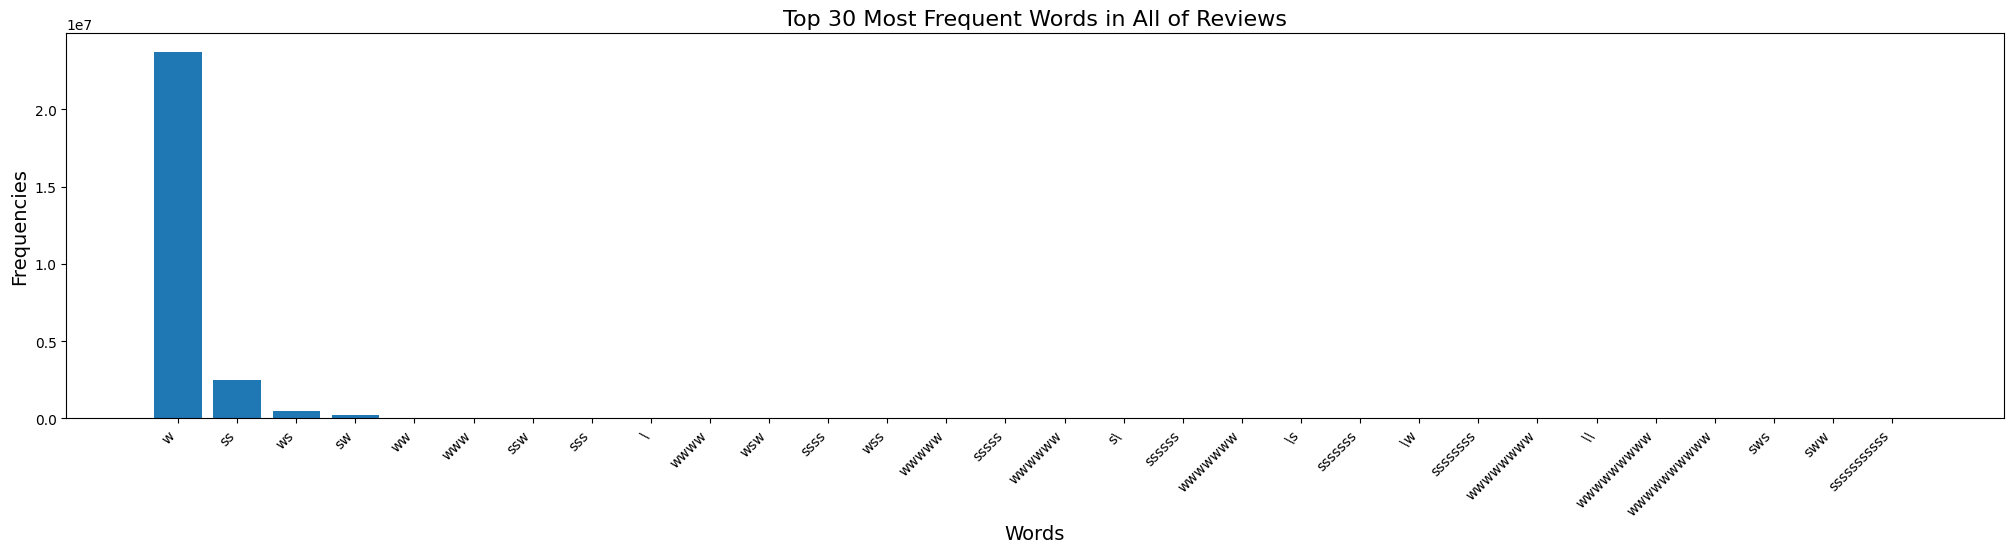

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 5))

words = [word for word, freq in first_tokens]
frequencies = [freq for word, freq in first_tokens]
#TODO: Create bar chart of the 30 most frequent words in positive reviews with appropriate title and axis labels
plt.bar(words, frequencies)

# Set the title and labels
plt.title('Top 30 Most Frequent Words in All of Reviews', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)

# Rotate the words on the x-axis for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

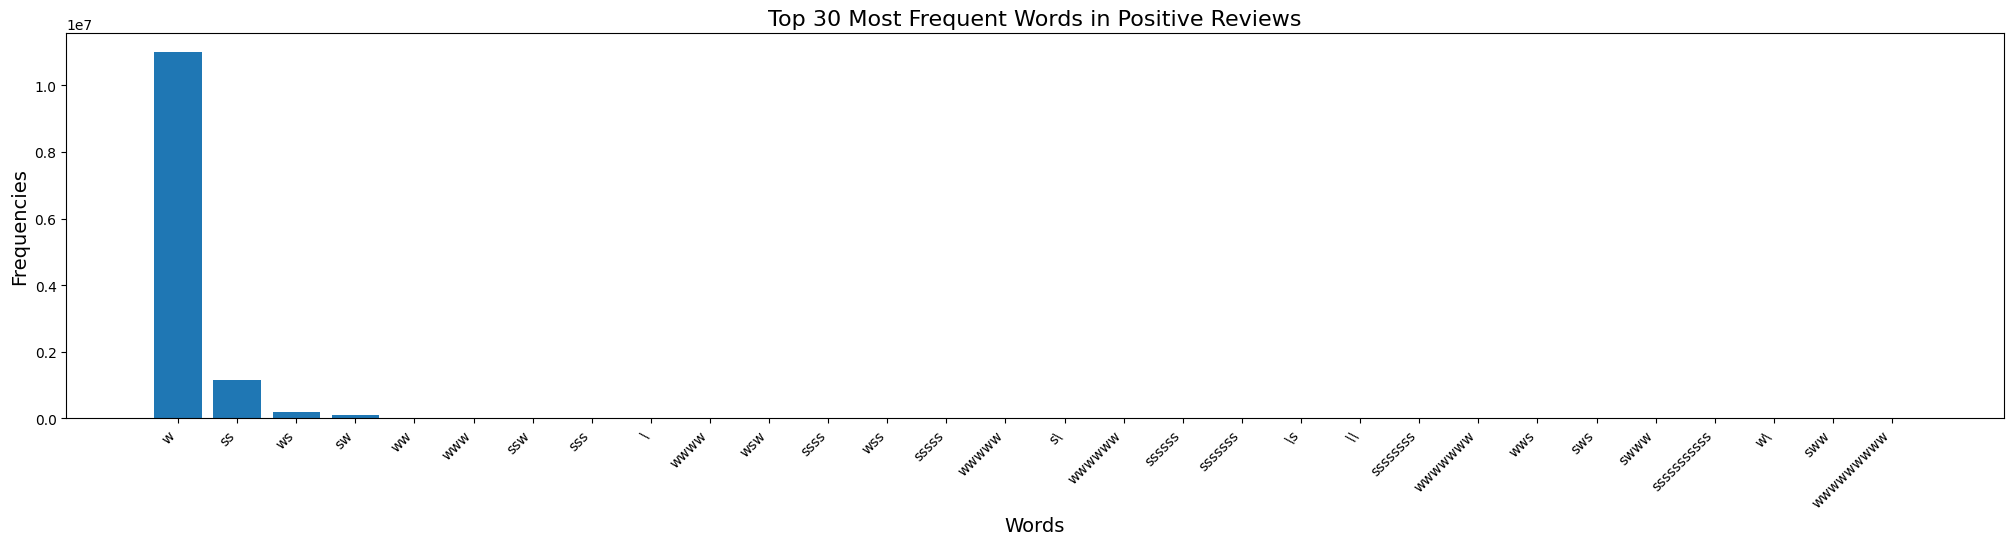

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 5))

words = [word for word, freq in first_positive_tokens]
frequencies = [freq for word, freq in first_positive_tokens]
#TODO: Create bar chart of the 30 most frequent words in positive reviews with appropriate title and axis labels
plt.bar(words, frequencies)

# Set the title and labels
plt.title('Top 30 Most Frequent Words in Positive Reviews', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)

# Rotate the words on the x-axis for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

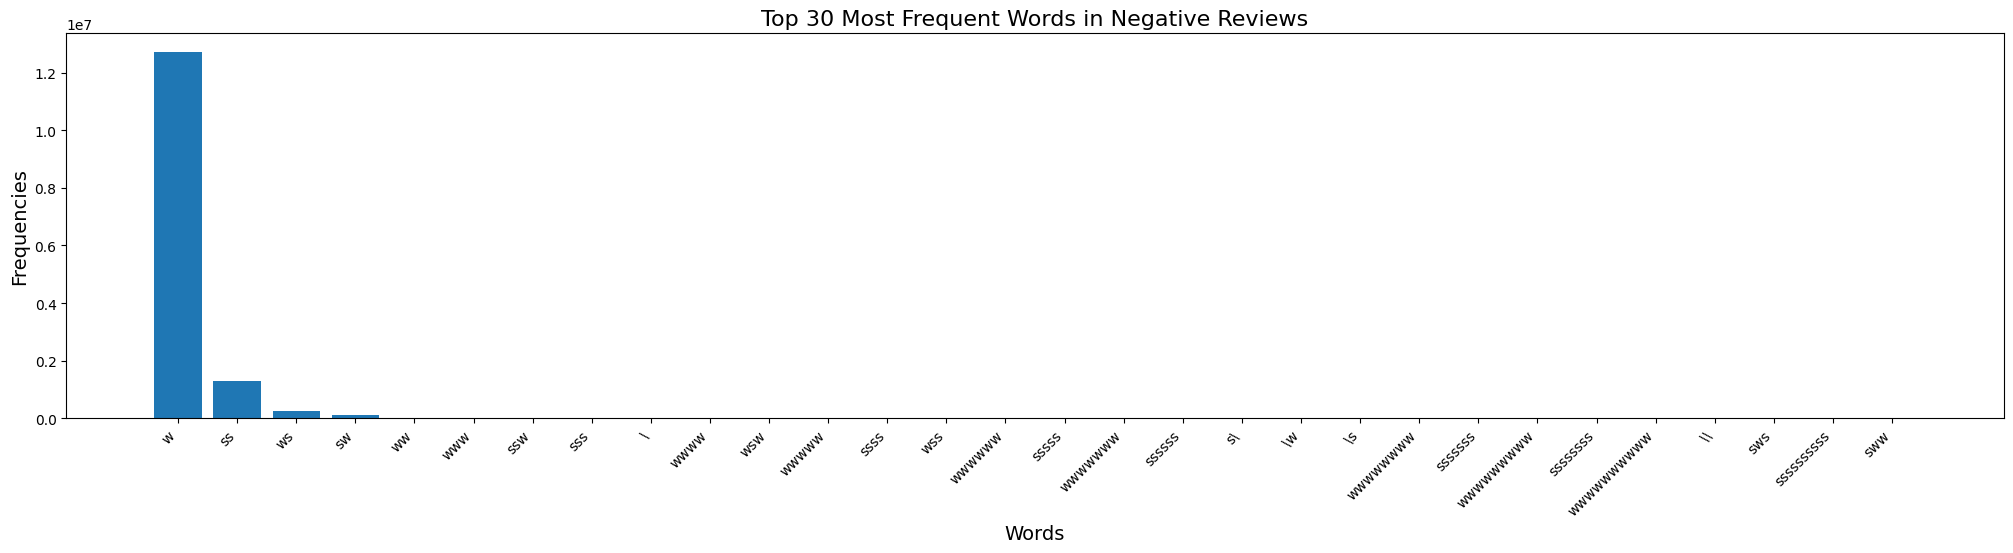

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 5))

words = [word for word, freq in first_negative_tokens]
frequencies = [freq for word, freq in first_negative_tokens]
#TODO: Create bar chart of the 30 most frequent words in positive reviews with appropriate title and axis labels
plt.bar(words, frequencies)

# Set the title and labels
plt.title('Top 30 Most Frequent Words in Negative Reviews', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)

# Rotate the words on the x-axis for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

Let's check the size of our vocabulary

In [35]:
print('Vocabulary size:',len(full_vocab))

Vocabulary size: 127


Now that our reviews are "clean" let's start the real work. Naive bayes includes three important components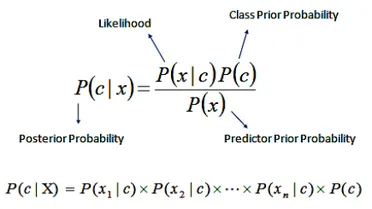

We need to calculate two things for the posterior probability: the likelihood and the class prior probability (since is naive bayes we ignore the predictor prior probability)

Let's first calculate the class prior probability. This meaning the probability a review is positive or negative without taking into account the content.

In [36]:
positive_prior = len(df_train[df_train['label'] == 1]) / len(df_train) # calculate positive prior
negative_prior = len(df_train[df_train['label'] == 0]) / len(df_train) # calculate negative prior

Now let's create a method to calculate the log likelihood of each word in our vocabulary

In [37]:
import math
SMOOTHING_FACTOR = 0.2
def calculate_log_likelihood(vocab, positive_vocab, negative_vocab, smoothing_factor=SMOOTHING_FACTOR):
  """ Calculates log likelihood of words belonging to a positive or negative review given a dataset and vocabulary
  Arguments
  ---------
  dataset : list of tuples
      List of positive or negative reviews with their respective label (label, text)
  vocab : dictionary
      Vocabulary of words in the dataset with their respective frequencies
  Returns
  -------
  likelihood : dictionary of dictionaries
      Dictionary of words and their positive and negative log likelihood with format {word: {'positive': log_likelihood, 'negative': log_likelihood}}
  """
  likelihood = {}
  # TODO: create a dictionary with the log likelihoods of each word
  number_instances_positive = sum(positive_vocab.values()) #number of words in positive_vocab
  number_instances_negative = sum(negative_vocab.values()) #number of words in negative_vocab
  number_types = len(vocab) #number of words in all vocab


  for word, count in vocab.items():
    likelihood[word] = {}
    # TODO: Calculate positive and negative log likelihood for EACH word.

    positive_count = positive_vocab.get(word, 0)
    positive_likelihood = (positive_count + smoothing_factor) / (number_instances_positive + smoothing_factor * number_types)
    likelihood[word]['positive'] = math.log(positive_likelihood) if positive_likelihood > 0 else float('-inf')

    negative_count = negative_vocab.get(word, 0)
    negative_likelihood = (negative_count + smoothing_factor) / (number_instances_negative + smoothing_factor * number_types)
    likelihood[word]['negative'] = math.log(negative_likelihood) if negative_likelihood > 0 else float('-inf')
    # IMPORTANT: remember some words might be in positives but not negatives (or the other way around, thats why we use the smoothing factor!)

  return likelihood

likelihood = calculate_log_likelihood(full_vocab,positive_vocab,negative_vocab)


Let's make sure we don't have any bugs till now

In [38]:
assert  round(sum([math.exp(likelihood[word]['positive']) for word in likelihood]))==1 , "There is probably a bug calculating the positive log likelihood"
assert  round(sum([math.exp(likelihood[word]['negative']) for word in likelihood]))==1 , "There is probably a bug calculating the negative log likelihood"
print("Great job! Keep going!")

Great job! Keep going!


Now the most essential function in our program, the method to actually classify unseen reviews.

In [39]:
def classify_review(text, likelihood, positive_prior, negative_prior):

    """ Calculates log scores for a new text given some prior probabilities and likelihoods
    Arguments
    ---------
    text : string
        Text to classify
    likelihood_positive : dictionary
        Dictionary of words and their log likelihood for positive reviews
    likelihood_negative : dictionary
        Dictionary of words and their log likelihood for negative reviews
    positive_prior : float
        Prior probability of a review being positive
    negative_prior : float
        Prior probability of a review being negative
    Returns
    -------
    predicted sentiment : string
        Predicted sentiment of the text
    sentiment_scores : tuple or dictionary
        Tuple of positive and negative sentiment scores
    """
    tokens = preprocess_text(text).split() # Preprocess the input review

    # Calculate the log scores for each sentiment category (take into account value for unseen tokens)
    log_score_positive = math.log(positive_prior)
    log_score_negative = math.log(negative_prior)

    for token in tokens:
        if token in likelihood:
            # Add the word's log likelihood to the scores
            log_score_positive += likelihood[token]['positive']
            log_score_negative += likelihood[token]['negative']

    sentiment_scores = {
        'positive': log_score_positive,
        'negative': log_score_negative,
    }


    predicted_sentiment = 'positive' if log_score_positive > log_score_negative else 'negative' # Determine the predicted sentiment based on the highest sentiment score


    return predicted_sentiment, sentiment_scores

In [40]:
text="This hair dryer is terribly bad, it doesn't work at all"
predicted_sentiment, sentiment_scores = classify_review(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of negative

negative
{'positive': -0.8189109726418707, 'negative': -0.8172536365698498}


In [41]:
text='This product was amazing I would buy it again'
predicted_sentiment, sentiment_scores = classify_review(text, likelihood,
                               positive_prior, negative_prior)
print(predicted_sentiment)
print(sentiment_scores)
#You should see here a correct prediction of positive

negative
{'positive': -0.9446747647237962, 'negative': -0.9413600925797544}


## Let's test our model

In all machine learning workflows is essential to test how well our model does with unseen data. Let's try testing the model with the provided test dataframe we created at the beggining, you remember?

In [42]:
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

for index,review in df_test.iterrows():
  true_label = review['label']
  text = review['text']
  #TODO: Iterate through test set, compare true label with predicted label and get evaluation metrics (precision, recall and F1)
  # Be patient! This code might take a while (about 5 minutes)
  predicted_sentiment, sentiment_scores = classify_review(text, likelihood, positive_prior, negative_prior)
  true_positives += 1 if true_label == 1 and predicted_sentiment == 'positive' else 0
  false_negatives += 1 if true_label == 1 and predicted_sentiment == 'negative' else 0
  true_negatives += 1 if true_label == 0 and predicted_sentiment == 'negative' else 0
  false_positives += 1 if true_label == 0 and predicted_sentiment == 'positive' else 0

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Precision:  0.5360441975822021
Recall:  0.090235
F1 Score:  0.15446768264239283


## Let's Experiment

Document any changes after this cell

Now it's your time to experiment to impress Jeff:

1.   modify the smoothing factor (use three different values)
1.   try using the raw texts withour any pre-processing techniques

Analyse and report how these modifications affect the predictions of your model(see more in handout)

**Using different smoothing factor**

In [43]:
smooth_factors = []
precisions = []
recalls = []
f1_scores = []
# smoothing_factors = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
smoothing_factors = []
for smf in smoothing_factors:
  likelihood = calculate_log_likelihood(vocab=full_vocab, positive_vocab=positive_vocab, negative_vocab=negative_vocab, smoothing_factor=smf)
  true_negatives = 0
  false_negatives = 0
  true_positives = 0
  false_positives = 0

  for index,review in df_test.iterrows():
    true_label = review['label']
    text = review['text']
    #TODO: Iterate through test set, compare true label with predicted label and get evaluation metrics (precision, recall and F1)
    # Be patient! This code might take a while (about 5 minutes)
    predicted_sentiment, sentiment_scores = classify_review(text, likelihood, positive_prior, negative_prior)
    true_positives += 1 if true_label == 1 and predicted_sentiment == 'positive' else 0
    false_negatives += 1 if true_label == 1 and predicted_sentiment == 'negative' else 0
    true_negatives += 1 if true_label == 0 and predicted_sentiment == 'negative' else 0
    false_positives += 1 if true_label == 0 and predicted_sentiment == 'positive' else 0

  precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
  recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
  f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
  smooth_factors.append(smf)
  precisions.append(precision)
  recalls.append(recall)
  f1_scores.append(f1_score)
  print("==> Done for smooth factor of ", smf)


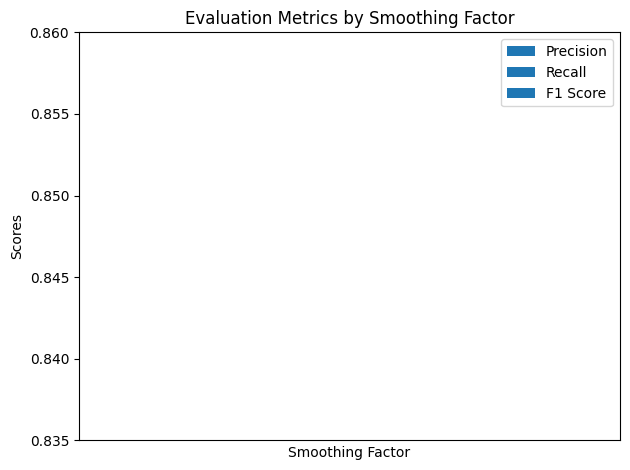

In [44]:
import numpy as np
bar_width = 0.2
x = np.arange(len(smooth_factors))

plt.bar(x - bar_width, precisions, width=bar_width, label='Precision', color='blue')
plt.bar(x, recalls, width=bar_width, label='Recall', color='orange')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='green')

# Adding labels and title
plt.xlabel('Smoothing Factor')
plt.ylabel('Scores')
plt.title('Evaluation Metrics by Smoothing Factor')
plt.xticks(x, smooth_factors)  # Set the x ticks to the smoothing factors
plt.legend()
plt.ylim(0.835, 0.86)

# Show the plot
plt.tight_layout()
plt.show()

**Using without preprocessing**

In [45]:
precisions = [0.8402]
recalls = [0.8535]
f1_scores = [0.8468]
true_negatives = 0
false_negatives = 0
true_positives = 0
false_positives = 0

for index,review in df_test.iterrows():
  true_label = review['label']
  text = review['text']
  #TODO: Iterate through test set, compare true label with predicted label and get evaluation metrics (precision, recall and F1)
  # Be patient! This code might take a while (about 5 minutes)
  predicted_sentiment, sentiment_scores = classify_review(text, likelihood, positive_prior, negative_prior)
  true_positives += 1 if true_label == 1 and predicted_sentiment == 'positive' else 0
  false_negatives += 1 if true_label == 1 and predicted_sentiment == 'negative' else 0
  true_negatives += 1 if true_label == 0 and predicted_sentiment == 'negative' else 0
  false_positives += 1 if true_label == 0 and predicted_sentiment == 'positive' else 0

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
precisions.append(precision)
recalls.append(recall)
f1_scores.append(f1_score)


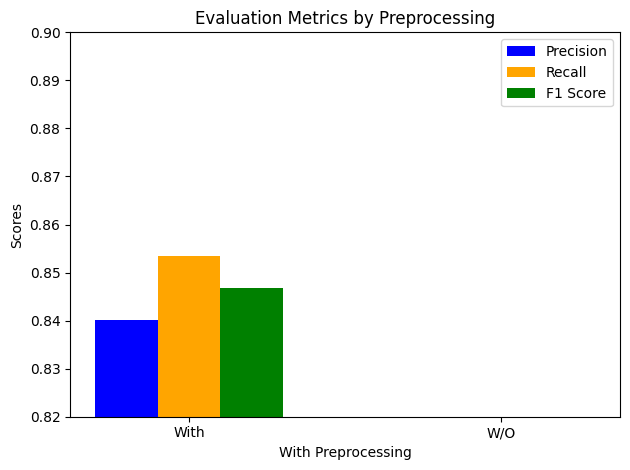

In [46]:
import numpy as np
x = np.arange(len([1, 0]))
bar_width = 0.2
plt.bar(x - bar_width, precisions, width=bar_width, label='Precision', color='blue')
plt.bar(x, recalls, width=bar_width, label='Recall', color='orange')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1 Score', color='green')

# Adding labels and title
plt.xlabel('With Preprocessing')
plt.ylabel('Scores')
plt.title('Evaluation Metrics by Preprocessing')
plt.xticks(x, ["With", "W/O"])  # Set the x ticks to the smoothing factors
plt.legend()
plt.ylim([0.82, 0.9])

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
print(precisions)
print(recalls)
print(f1_scores)

[0.8402, 0.5360441975822021]
[0.8535, 0.090235]
[0.8468, 0.15446768264239283]
